In [1]:
# Imports
import matplotlib.pyplot as plt

from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.plotting import MazePlot
import numpy as np
import DQN.agent as agent
import DQN.models as models
import maze_generator.maze_dataset as md
import maze_dataset
import Maze_env.wrappers.rewards as rw



In [2]:
dataset = md.Maze_dataset(1,(3,3),'percolation')
maze = dataset[0]

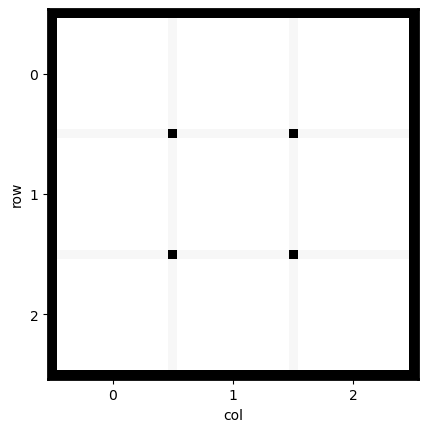

In [3]:
for i in range(len(dataset)):
    dataset.show_maze(i)

In [4]:
rewards = rw.reward_dist(GOAL = 50.0,
                         SEE_GOAL = 0.005,
                         DONT_SEE_GOAL = -0.01,
                         NEW_PLACE = 0.05,
                         OLD_PLACE = -1.0,
                         GET_CLOSER = 5.0,
                         GET_FARTHER = -0.01,
                         DIST = 0.0)
mult_agent = agent.maze_agents(models.basic_NN,vision=3,action_type='cardinal',
                               rewards_dist=rewards)
mult_agent.run_agent(maze,len_game=50,num_agents=1,epsilon=1,sample_prob=False,
                     start_dist=7, output_frame_rewards=True)

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


Frame: 1 reward: [0.0064672]
Frame: 2 reward: [-1.2335328]
Frame: 3 reward: [0.22098377]
Frame: 4 reward: [-1.67234957]
Frame: 5 reward: [-2.11679401]
Frame: 6 reward: [-2.56123846]
Frame: 7 reward: [0.00765043]
Frame: 8 reward: [-0.00444444]
Frame: 9 reward: [-0.1493866]
Frame: 10 reward: [-1.55679401]
Frame: 11 reward: [-1.34790512]
Frame: 12 reward: [-0.91555556]
Frame: 13 reward: [-1.68888889]
Frame: 14 reward: [-0.59501428]
Frame: 15 reward: [-1.80444444]
Frame: 16 reward: [-1.03945873]
Frame: 17 reward: [-2.56686614]
Frame: 18 reward: [-3.01131058]
Frame: 19 reward: [-2.24888889]
Frame: 20 reward: [-2.37279206]
Frame: 21 reward: [-2.00123846]
Frame: 22 reward: [-3.57131058]
Frame: 23 reward: [-2.4456829]
Frame: 24 reward: [-4.33901623]
Frame: 25 reward: [-1.79234957]
Frame: 26 reward: [-3.33457179]
Frame: 27 reward: [-2.23679401]
Frame: 28 reward: [-0.00444444]
Frame: 29 reward: [-1.24444444]
Frame: 30 reward: [-1.92716438]
Frame: 31 reward: [-2.69333333]
Frame: 32 reward: [-3.26

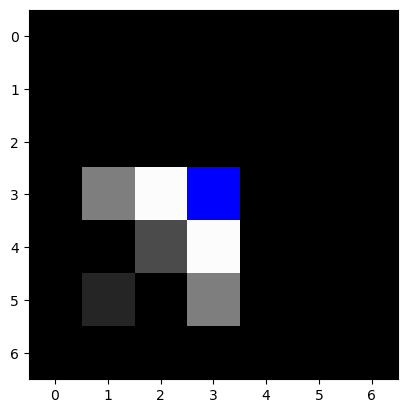

In [5]:
mult_agent.animate_last_replay(0,name='test18')

In [10]:
load = agent.maze_agents.load('nonCur_Test')
testing_dataset = md.Maze_dataset(1,shape=(3,3),maze_type='percolation')
load.run_agent(testing_dataset[0],len_game=15,n_episodes=20,agents_pos = None, targets_pos =None,
               start_dist=5)

cumulative reward: [-57.28968794]
cumulative reward: [-57.33777778]
cumulative reward: [-50.11797725]
cumulative reward: [-65.]
cumulative reward: [-65.]
cumulative reward: [-57.28968794]
cumulative reward: [-57.33777778]
cumulative reward: [-57.33777778]
cumulative reward: [-57.33777778]
cumulative reward: [-55.73413239]
cumulative reward: [-64.96965869]
cumulative reward: [27.36344901]
cumulative reward: [-56.56]
cumulative reward: [-23.67385437]
cumulative reward: [24.65777778]
cumulative reward: [-50.11679401]
cumulative reward: [26.4343171]
cumulative reward: [-56.25265091]
cumulative reward: [-56.25265091]
cumulative reward: [-65.]


In [7]:
load.test_agent(testing_dataset,n_episodes=1000,len_game=15,
                num_agents=1,start_dist=5)

0.495

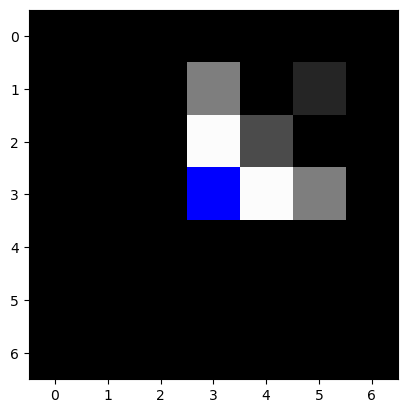

In [8]:
load.animate_last_replay(0,'vision')